In [3]:
!pip3 install flaml numpy joblib scikit-learn

  Using cached FLAML-2.1.1-py3-none-any.whl (295 kB)


In [2]:
import joblib
import numpy as np

data_directory = '/kaggle/input/optimize'

print("Loading data...")
X = joblib.load(f'{data_directory}/X.data')
Y = joblib.load(f'{data_directory}/Y.data')

index = np.arange(len(X))

N_fold = 5

print("Splitting data into training and testing...")
X_train, Y_train = X[index%N_fold != 0], Y[index%N_fold != 0]
X_test, Y_test = X[index%N_fold == 0], Y[index%N_fold == 0]

Loading data...
Splitting data into training and testing...


In [41]:
baseline = np.ones(len(Y_test)) * -0.06
print("baseline mae: ", sklearn.metrics.mean_absolute_error(Y_test, baseline))

baseline mae:  6.513835628737669


In [ ]:
#zero shot ml lgbm
from flaml import AutoML

automl = AutoML()

automl.fit(X_train, Y_train, 
           task="regression", 
           estimator_list=["lgbm"], 
           metric='mae',
           verbose=10)

In [ ]:
#zero shot xgboost
from flaml import AutoML

automl = AutoML()

automl.fit(X_train, Y_train, 
           task="regression", 
           estimator_list=["xgboost"], 
           metric='mae',
           verbose=10)

In [ ]:
#calculating error
import sklearn
Y_pred = automl.predict(X_test)
print("mae: ", sklearn.metrics.mean_absolute_error(Y_test, Y_pred))

In [50]:
#LGBME estimator
from flaml.default import LGBMRegressor

estimator = LGBMRegressor(objective='regression_l1')
# The hyperparameters are automatically set according to the training data.
estimator.fit(X_train, Y_train)

LGBMRegressor(colsample_bytree=0.7019911744574896,
              learning_rate=0.022635758411078528, max_bin=511,
              min_child_samples=2, n_estimators=4797, num_leaves=122,
              objective='regression_l1', reg_alpha=0.004252223402511765,
              reg_lambda=0.11288241427227624, verbose=-1)

In [ ]:
#tuned settings
import lightgbm as lgb
lmodel = lgb.LGBMRegressor(objective='regression_l1',
                           colsample_bytree=0.7019911744574896,
                           learning_rate=0.022635758411078528,
                           max_bin=511,
                           min_child_samples=2,
                           n_estimators=4797,
                           num_leaves=122,
                           reg_alpha=0.004252223402511765,
                           reg_lambda=0.11288241427227624
                          )
lmodel.fit(X_train, Y_train,
           eval_set=[(X_test[2000:, :], Y_test[2000:])],
           verbose=10, early_stopping_rounds=100
             )


In [18]:

import sklearn
Y_pred = lmodel.predict(X_test[:2000, :])
print("mae: ", sklearn.metrics.mean_absolute_error(Y_test[:2000], Y_pred))

mae:  6.328054560258854


In [6]:
#untuned
import lightgbm as lgb

model_dict = {
    'lgbm' : lgb.LGBMRegressor(objective='regression_l1',
                           n_estimators=500
                          ),
}


models = []

for i in range(N_fold):
    model = model_dict['lgbm']
    model.fit(X[index%N_fold!=i], Y[index%N_fold!=i],
               eval_set=[(X[index%N_fold==i], Y[index%N_fold==i])],
               verbose=10, early_stopping_rounds=100
                 )
    models.append(model)
    

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's l1: 6.41723
[20]	valid_0's l1: 6.39595
[30]	valid_0's l1: 6.38629
[40]	valid_0's l1: 6.38041
[50]	valid_0's l1: 6.37587
[60]	valid_0's l1: 6.37248
[70]	valid_0's l1: 6.37048
[80]	valid_0's l1: 6.36755
[90]	valid_0's l1: 6.36592
[100]	valid_0's l1: 6.36502
[110]	valid_0's l1: 6.36417
[120]	valid_0's l1: 6.36377
[130]	valid_0's l1: 6.36266
[140]	valid_0's l1: 6.36214
[150]	valid_0's l1: 6.36171
[160]	valid_0's l1: 6.36088
[170]	valid_0's l1: 6.36019
[180]	valid_0's l1: 6.35992
[190]	valid_0's l1: 6.35903
[200]	valid_0's l1: 6.35841
[210]	valid_0's l1: 6.35781
[220]	valid_0's l1: 6.35738
[230]	valid_0's l1: 6.35676
[240]	valid_0's l1: 6.35635
[250]	valid_0's l1: 6.35591
[260]	valid_0's l1: 6.3555
[270]	valid_0's l1: 6.35527
[280]	valid_0's l1: 6.35482
[290]	valid_0's l1: 6.35466
[300]	valid_0's l1: 6.35422
[310]	valid_0's l1: 6.35372
[320]	valid_0's l1: 6.35332
[330]	valid_0's l1: 6.35284
[340]	valid_0's l1: 6.35259
[350]	valid_0's l1: 6.35235
[360]	valid_0's l1: 6.35212
[3

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's l1: 6.27102
[20]	valid_0's l1: 6.25094
[30]	valid_0's l1: 6.24084
[40]	valid_0's l1: 6.23514
[50]	valid_0's l1: 6.231
[60]	valid_0's l1: 6.22813
[70]	valid_0's l1: 6.22535
[80]	valid_0's l1: 6.22394
[90]	valid_0's l1: 6.22258
[100]	valid_0's l1: 6.22117
[110]	valid_0's l1: 6.2199
[120]	valid_0's l1: 6.21837
[130]	valid_0's l1: 6.21752
[140]	valid_0's l1: 6.21656
[150]	valid_0's l1: 6.21598
[160]	valid_0's l1: 6.21538
[170]	valid_0's l1: 6.21501
[180]	valid_0's l1: 6.21454
[190]	valid_0's l1: 6.21386
[200]	valid_0's l1: 6.21313
[210]	valid_0's l1: 6.21267
[220]	valid_0's l1: 6.21238
[230]	valid_0's l1: 6.21189
[240]	valid_0's l1: 6.21117
[250]	valid_0's l1: 6.21068
[260]	valid_0's l1: 6.21026
[270]	valid_0's l1: 6.20977
[280]	valid_0's l1: 6.20885
[290]	valid_0's l1: 6.20833
[300]	valid_0's l1: 6.20801
[310]	valid_0's l1: 6.20775
[320]	valid_0's l1: 6.20755
[330]	valid_0's l1: 6.20738
[340]	valid_0's l1: 6.20715
[350]	valid_0's l1: 6.20697
[360]	valid_0's l1: 6.20676
[370

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's l1: 6.2184
[20]	valid_0's l1: 6.19926
[30]	valid_0's l1: 6.18998
[40]	valid_0's l1: 6.18443
[50]	valid_0's l1: 6.17981
[60]	valid_0's l1: 6.17737
[70]	valid_0's l1: 6.17473
[80]	valid_0's l1: 6.17323
[90]	valid_0's l1: 6.17185
[100]	valid_0's l1: 6.17128
[110]	valid_0's l1: 6.17042
[120]	valid_0's l1: 6.16926
[130]	valid_0's l1: 6.16839
[140]	valid_0's l1: 6.16793
[150]	valid_0's l1: 6.16737
[160]	valid_0's l1: 6.16682
[170]	valid_0's l1: 6.16605
[180]	valid_0's l1: 6.16537
[190]	valid_0's l1: 6.1644
[200]	valid_0's l1: 6.16382
[210]	valid_0's l1: 6.16346
[220]	valid_0's l1: 6.1631
[230]	valid_0's l1: 6.16226
[240]	valid_0's l1: 6.16133
[250]	valid_0's l1: 6.16109
[260]	valid_0's l1: 6.16006
[270]	valid_0's l1: 6.15931
[280]	valid_0's l1: 6.15895
[290]	valid_0's l1: 6.1586
[300]	valid_0's l1: 6.15836
[310]	valid_0's l1: 6.15816
[320]	valid_0's l1: 6.1579
[330]	valid_0's l1: 6.15781
[340]	valid_0's l1: 6.15731
[350]	valid_0's l1: 6.15707
[360]	valid_0's l1: 6.15685
[370]	

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's l1: 6.28224
[20]	valid_0's l1: 6.2639
[30]	valid_0's l1: 6.25532
[40]	valid_0's l1: 6.24944
[50]	valid_0's l1: 6.24533
[60]	valid_0's l1: 6.24264
[70]	valid_0's l1: 6.24061
[80]	valid_0's l1: 6.23904
[90]	valid_0's l1: 6.2377
[100]	valid_0's l1: 6.23645
[110]	valid_0's l1: 6.23578
[120]	valid_0's l1: 6.23527
[130]	valid_0's l1: 6.23476
[140]	valid_0's l1: 6.23408
[150]	valid_0's l1: 6.23344
[160]	valid_0's l1: 6.23313
[170]	valid_0's l1: 6.23269
[180]	valid_0's l1: 6.232
[190]	valid_0's l1: 6.2316
[200]	valid_0's l1: 6.23124
[210]	valid_0's l1: 6.23042
[220]	valid_0's l1: 6.22982
[230]	valid_0's l1: 6.22945
[240]	valid_0's l1: 6.22886
[250]	valid_0's l1: 6.22817
[260]	valid_0's l1: 6.22774
[270]	valid_0's l1: 6.22723
[280]	valid_0's l1: 6.22674
[290]	valid_0's l1: 6.22625
[300]	valid_0's l1: 6.22562
[310]	valid_0's l1: 6.22507
[320]	valid_0's l1: 6.22468
[330]	valid_0's l1: 6.22439
[340]	valid_0's l1: 6.22412
[350]	valid_0's l1: 6.22397
[360]	valid_0's l1: 6.22364
[370]	

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's l1: 6.40805
[20]	valid_0's l1: 6.3887
[30]	valid_0's l1: 6.3801
[40]	valid_0's l1: 6.37413
[50]	valid_0's l1: 6.37041
[60]	valid_0's l1: 6.36728
[70]	valid_0's l1: 6.36489
[80]	valid_0's l1: 6.36242
[90]	valid_0's l1: 6.36146
[100]	valid_0's l1: 6.36049
[110]	valid_0's l1: 6.35979
[120]	valid_0's l1: 6.35866
[130]	valid_0's l1: 6.35792
[140]	valid_0's l1: 6.35705
[150]	valid_0's l1: 6.35565
[160]	valid_0's l1: 6.35496
[170]	valid_0's l1: 6.35439
[180]	valid_0's l1: 6.35389
[190]	valid_0's l1: 6.35329
[200]	valid_0's l1: 6.35279
[210]	valid_0's l1: 6.35257
[220]	valid_0's l1: 6.35207
[230]	valid_0's l1: 6.3518
[240]	valid_0's l1: 6.35109
[250]	valid_0's l1: 6.35088
[260]	valid_0's l1: 6.35045
[270]	valid_0's l1: 6.35014
[280]	valid_0's l1: 6.34966
[290]	valid_0's l1: 6.34944
[300]	valid_0's l1: 6.34927
[310]	valid_0's l1: 6.34879
[320]	valid_0's l1: 6.34829
[330]	valid_0's l1: 6.34803
[340]	valid_0's l1: 6.34759
[350]	valid_0's l1: 6.34709
[360]	valid_0's l1: 6.34672
[370

In [42]:
import sklearn
Y_pred = np.mean([model.predict(X_test) for model in models], 0)
print("mae: ", sklearn.metrics.mean_absolute_error(Y_test, Y_pred))

mae:  6.307263003115764


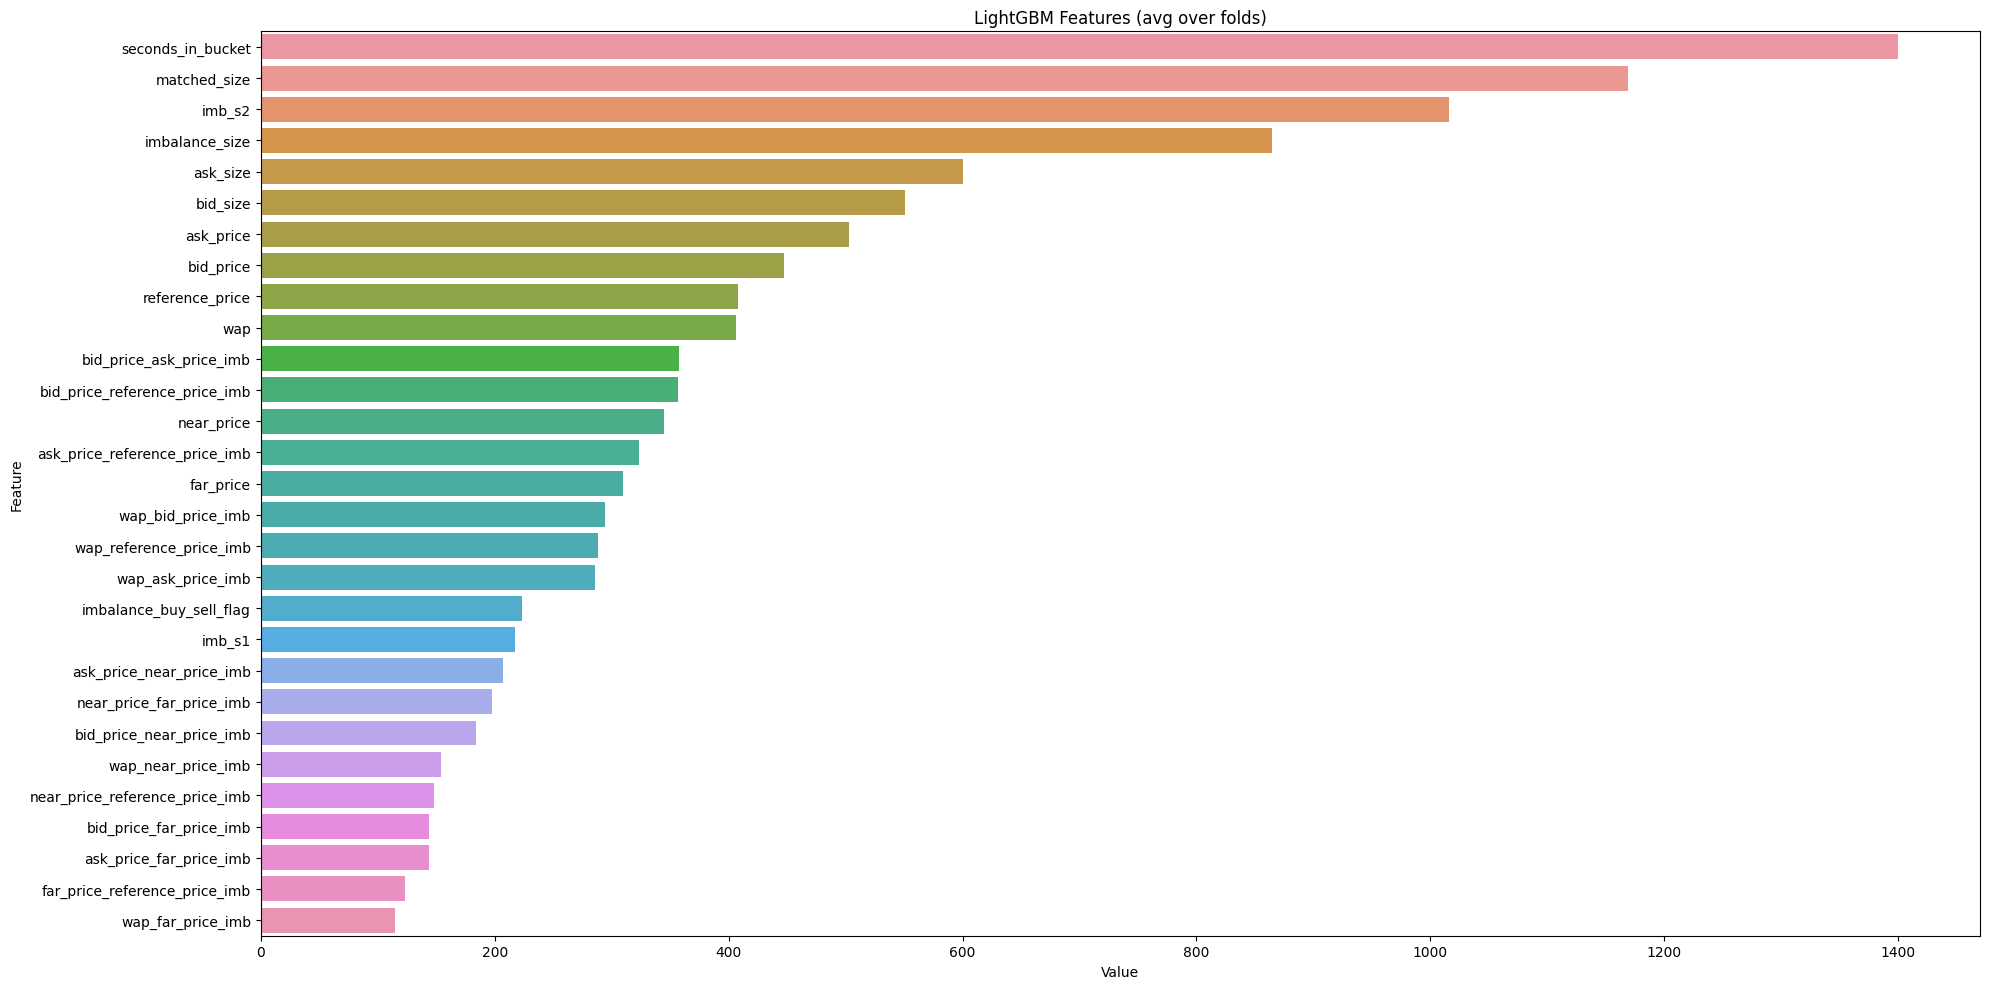

<Figure size 640x480 with 0 Axes>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

features = ['seconds_in_bucket', 'imbalance_buy_sell_flag',
               'imbalance_size', 'matched_size', 'bid_size', 'ask_size',
                'reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap',
                'imb_s1', 'imb_s2'
               ]
    
prices = ['reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']

for i,a in enumerate(prices):
    for j,b in enumerate(prices):
        if i>j:
            df[f'{a}_{b}_imb'] = df.eval(f'({a}-{b})/({a}+{b})')
            features.append(f'{a}_{b}_imb')    

warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(models[0].feature_importances_,features)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [ ]:
from flaml import AutoML

automl = AutoML()

automl.fit(X_train, Y_train, 
           task="regression", 
           estimator_list=["lgbm"], 
           metric='mae',
           verbose=10,
           seed=69,
           time_budget=3600,
          )

In [51]:
from flaml import AutoML
from flaml.automl.data import load_openml_dataset

# Download [houses dataset](https://www.openml.org/d/537) from OpenML. The task is to predict median price of the house in the region based on demographic composition and a state of housing market in the region.
X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=537, data_dir='./')

automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['lgbm'],  # list of ML learners; we tune lightgbm in this example
    "task": 'regression',  # task type
    "log_file_name": 'houses_experiment.log',  # flaml log file
    "seed": 7654321,  # random seed
}
automl.fit(X_train=X_train, y_train=y_train, **settings)

ModuleNotFoundError: No module named 'openml'